# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

##### **Marketing Campaign Dataset:**
Who: The target auidence for this could be a marketing team at a company. This might include people such as the Chief Marketing Officer (CMO), customer insights analytics, or digital campaign managers to help refine marketing strategies.

What: We want them to know that personalized targreting based on customer insights can improve campaign impacts. We also want them to know that certain customer profiles respond better to specific marketing campaign types.

How: This can be done using visualizations such as bar charts, box plots, or heatmaps that highlight customer behavior trends across demographics.

##### **Customer Churn Dataset:**
Who: The target audience here can include customer success teams, retention analysts, and executives like the Chief Revenue Officer (CRO) or the Head of Customer Experience. These stakeholders are interested in minimizing churn and understanding early warning signs in customer behavior.

What: We want them to know which customer attributes (such as contract length, monthly charges, or tenure) are most associated with churn. This  can help prioritize outreach efforts, design better retention offers, or flag at-risk accounts before they leave.

How: This can be done using visualizations such as survival curves, churn vs. non-churn comparison boxplots, or heatmaps showing churn likelihood by key categorical factors. Pairing this with classification models can also help score and rank churn risk.


##### **Digital Marketing Campaign Dataset:**
Who: The target audience for this could be digital marketers and growth teams at e-commerce or media companies. This includes digital advertising strategists and performance marketing leads who want to maximize the effectiveness of ad spend.

What: We want them to understand what traits and behaviors are most predictive of whether a user will convert. This can help them allocate advertising budget more effectively and tailor messaging based on user segment insights.

How: This can be done using tools such as logistic regression probability plots, boxplots comparing converters vs. non-converters, or bar charts showing conversion rates across income or age brackets. Visualizations that clearly highlight high-performing customer profiles will be most useful.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!


- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

### **Dataset 1: Digital Marketing Project: Predicting Customer Value, Conversion, and Churn**
#### Load the dataset. I will be working with the first dataset included in this project for this journal which is the Marketing Campaign Dataset from Kaggle.

In [2]:
#Dataset 1: Marketing Campaign Dataset
marketing_campaign = pd.read_csv("marketing_campaign.csv", sep=';')
marketing_campaign

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


#### 1. Use describe() and info() to analyze the data. Also, look at the first few rows.

In [3]:
marketing_campaign.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
marketing_campaign.head(10) #look at first 10 rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


#### 2. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

In [6]:
#check for rows with null values
nullrows = marketing_campaign[marketing_campaign.isnull().any(axis=1)]
print(nullrows)

         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Gra

In [7]:
#remove null row
marketing_campaign.dropna(inplace=True)
marketing_campaign

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


#### 3. Check for any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

In [8]:
marketing_campaign[marketing_campaign.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


no duplicate rows!

#### 4. Find the mean, median, and mode of each column

In [9]:
mean = marketing_campaign.mean(numeric_only=True)
print(mean)

ID                      5588.353339
Year_Birth              1968.820397
Income                 52247.251354
Kidhome                    0.441787
Teenhome                   0.505415
Recency                   49.012635
MntWines                 305.091606
MntFruits                 26.356047
MntMeatProducts          166.995939
MntFishProducts           37.637635
MntSweetProducts          27.028881
MntGoldProds              43.965253
NumDealsPurchases          2.323556
NumWebPurchases            4.085289
NumCatalogPurchases        2.671029
NumStorePurchases          5.800993
NumWebVisitsMonth          5.319043
AcceptedCmp3               0.073556
AcceptedCmp4               0.074007
AcceptedCmp5               0.073105
AcceptedCmp1               0.064079
AcceptedCmp2               0.013538
Complain                   0.009477
Z_CostContact              3.000000
Z_Revenue                 11.000000
Response                   0.150271
dtype: float64


In [10]:
median = marketing_campaign.median(numeric_only=True)
print(median)

ID                      5458.5
Year_Birth              1970.0
Income                 51381.5
Kidhome                    0.0
Teenhome                   0.0
Recency                   49.0
MntWines                 174.5
MntFruits                  8.0
MntMeatProducts           68.0
MntFishProducts           12.0
MntSweetProducts           8.0
MntGoldProds              24.5
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        2.0
NumStorePurchases          5.0
NumWebVisitsMonth          6.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Z_CostContact              3.0
Z_Revenue                 11.0
Response                   0.0
dtype: float64


In [11]:
mode = marketing_campaign.mode(numeric_only=True).iloc[0]
print(mode)

ID                        0.0
Year_Birth             1976.0
Income                 7500.0
Kidhome                   0.0
Teenhome                  0.0
Recency                  56.0
MntWines                  2.0
MntFruits                 0.0
MntMeatProducts           7.0
MntFishProducts           0.0
MntSweetProducts          0.0
MntGoldProds              1.0
NumDealsPurchases         1.0
NumWebPurchases           2.0
NumCatalogPurchases       0.0
NumStorePurchases         3.0
NumWebVisitsMonth         7.0
AcceptedCmp3              0.0
AcceptedCmp4              0.0
AcceptedCmp5              0.0
AcceptedCmp1              0.0
AcceptedCmp2              0.0
Complain                  0.0
Z_CostContact             3.0
Z_Revenue                11.0
Response                  0.0
Name: 0, dtype: float64


### Conclusions:

- Are the data usable?  If not, find some new data. 
> Data is usable! No duplicates and null rows have been removed.

- Do you need to modify or correct the data in some way?
> I have removed the null rows and the data seems ready to use!
- Is there any class imbalance?  (Categories that have many more items than other categories).
> There does not seem to be any class imbalance.

##### *Repeat process for the next 2 datasets*

##### **Dataset 2: Customer Churn Dataset**
The dataset is split into training and testing sets. I combined the two to do preprocessing on the full dataset:

In [12]:
#load data
train_cc = pd.read_csv('customer_churn_dataset-training-master.csv')
test_cc = pd.read_csv('customer_churn_dataset-testing-master.csv')
#combine train and test set
customer_churn = pd.concat([train_cc, test_cc], ignore_index=True)
customer_churn.head() #display first couple rows

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


#### 1. Use describe() and info() to analyze the data.

In [13]:
customer_churn.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [14]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


#### 2. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

In [15]:
#check for rows with null values
nullrows_cc = customer_churn[customer_churn.isnull().any(axis=1)]
print(nullrows_cc)

        CustomerID  Age Gender  Tenure  Usage Frequency  Support Calls  \
199295         NaN  NaN    NaN     NaN              NaN            NaN   

        Payment Delay Subscription Type Contract Length  Total Spend  \
199295            NaN               NaN             NaN          NaN   

        Last Interaction  Churn  
199295               NaN    NaN  


In [16]:
#remove null rows
customer_churn.dropna(inplace=True)

#### 3. Check for any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

In [17]:
customer_churn[customer_churn.duplicated()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


#### 4. Find the mean, median, and mode of each column

In [18]:
customer_churn.mean(numeric_only=True)

CustomerID          200779.451782
Age                     39.704172
Tenure                  31.350435
Usage Frequency         15.714825
Support Calls            3.833317
Payment Delay           13.496843
Total Spend            620.072766
Last Interaction        14.610581
Churn                    0.555203
dtype: float64

In [19]:
customer_churn.median(numeric_only=True)

CustomerID          193039.5
Age                     40.0
Tenure                  32.0
Usage Frequency         16.0
Support Calls            3.0
Payment Delay           13.0
Total Spend            648.9
Last Interaction        14.0
Churn                    1.0
dtype: float64

In [20]:
customer_churn.mode(numeric_only=True).iloc[1]

CustomerID            3.0
Age                   NaN
Tenure                NaN
Usage Frequency       NaN
Support Calls         NaN
Payment Delay         NaN
Total Spend         432.0
Last Interaction      NaN
Churn                 NaN
Name: 1, dtype: float64

### Conclusions:

- Are the data usable?  If not, find some new data. 
> Data is usable! No duplicates and null rows have been removed.

- Do you need to modify or correct the data in some way?
> I have removed the null rows and the data seems ready to use!
- Is there any class imbalance?  (Categories that have many more items than other categories).
> There does not seem to be any class imbalance.

##### **Dataset 3: Digital Marketing Campaign Dataset**

In [21]:
dm_campaign = pd.read_csv('digital_marketing_campaign_dataset.csv')
dm_campaign.head() #display first couple rows

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


#### 1. Use describe() and info() to analyze the data.

In [22]:
dm_campaign.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [23]:
dm_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

#### 2. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

In [24]:
#check for rows with null values
nullrows_dm = dm_campaign[dm_campaign.isnull().any(axis=1)]
print(nullrows_dm)

Empty DataFrame
Columns: [CustomerID, Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, AdvertisingPlatform, AdvertisingTool, Conversion]
Index: []


no null values!

#### 3. Check for any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

In [25]:
dm_campaign[dm_campaign.duplicated()]

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion


no duplicates!

#### 4. Find the mean, median, and mode of each column

In [26]:
dm_campaign.mean(numeric_only=True)

CustomerID           11999.500000
Age                     43.625500
Income               84664.196750
AdSpend               5000.944830
ClickThroughRate         0.154829
ConversionRate           0.104389
WebsiteVisits           24.751625
PagesPerVisit            5.549299
TimeOnSite               7.727718
SocialShares            49.799750
EmailOpens               9.476875
EmailClicks              4.467375
PreviousPurchases        4.485500
LoyaltyPoints         2490.268500
Conversion               0.876500
dtype: float64

In [27]:
dm_campaign.median(numeric_only=True)

CustomerID           11999.500000
Age                     43.000000
Income               84926.500000
AdSpend               5013.440044
ClickThroughRate         0.154505
ConversionRate           0.104046
WebsiteVisits           25.000000
PagesPerVisit            5.534257
TimeOnSite               7.682956
SocialShares            50.000000
EmailOpens               9.000000
EmailClicks              4.000000
PreviousPurchases        4.000000
LoyaltyPoints         2497.000000
Conversion               1.000000
dtype: float64

In [28]:
dm_campaign.mode(numeric_only=True).iloc[1]

CustomerID            8001.000000
Age                           NaN
Income               73096.000000
AdSpend                100.668227
ClickThroughRate         0.010052
ConversionRate           0.010020
WebsiteVisits           43.000000
PagesPerVisit            1.001882
TimeOnSite               0.501684
SocialShares                  NaN
EmailOpens                    NaN
EmailClicks                   NaN
PreviousPurchases             NaN
LoyaltyPoints         1747.000000
Conversion                    NaN
Name: 1, dtype: float64

### Conclusions:

- Are the data usable?  If not, find some new data. 
> Data is usable! No duplicates and null rows have been removed.

- Do you need to modify or correct the data in some way?
> I have removed the null rows and the data seems ready to use!
- Is there any class imbalance?  (Categories that have many more items than other categories).
> There does not seem to be any class imbalance.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

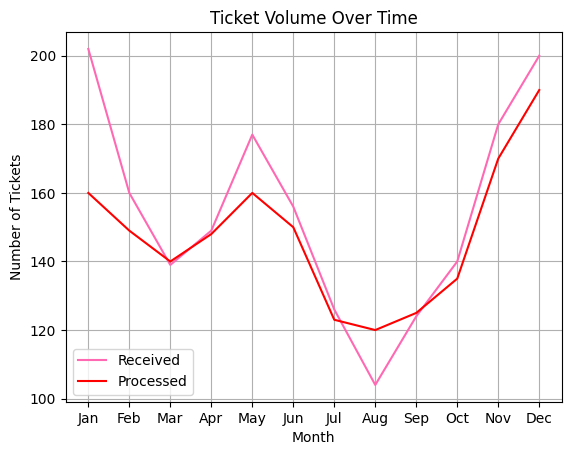

In [29]:
import matplotlib.pyplot as plt
#remaking the "Ticket Volume Over Time" graph from the Introduction of the book (Figure 0.3)
#create sample data:
months = [
    "Jan", "Feb", "Mar", 'Apr', "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
received = [202, 160, 139, 149, 177, 156, 126, 104, 124, 140, 180, 200]
processed = [160, 149, 140, 148, 160, 150, 123, 120, 125, 135, 170, 190]

#plot
plt.plot(months, received, label='Received', color='hotpink')
plt.plot(months, processed, label='Processed', color='red')
plt.title("Ticket Volume Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Tickets")
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()